
### Step 1: Install Required Libraries

First, ensure you have the necessary libraries installed. In Google Colab, you can run shell commands by prefixing them with `!`.

In [ ]:
!pip install httpx==0.23.0

In [ ]:
!pip install llama-index-llms-openai

In [ ]:
!pip install openai langchain-community llama_index kagglehub pymupdf
!pip install llama_index pyvis Ipython langchain
!pip install llama-index-llms-huggingface
!pip install llama-index-embeddings-langchain
!pip install -U langchain-openai


### Step 2:  **Import Libraries**

Next, import the necessary libraries in your Python code.

In [ ]:
# Enable Diagnostic Logging
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))

In [ ]:
# Import Required Dependencies
from llama_index.core import SimpleDirectoryReader, KnowledgeGraphIndex, Settings, StorageContext
from llama_index.core.graph_stores import SimpleGraphStore
from llama_index.llms.openai import OpenAI
from llama_index.embeddings.langchain import LangchainEmbedding
from langchain.embeddings import OpenAIEmbeddings
from llama_index.readers.file import PyMuPDFReader
from pyvis.network import Network
import kagglehub


### Step 3:  **Import Kaggle Dataset**

Next, import the necessary dataset in your Python code.

In [ ]:
# Download Dataset from Kaggle
path = kagglehub.dataset_download("sajith4457/pdf-files")
print("Path to dataset files:", path)

# Function to Load Documents from a Directory
def load_documents_from_directory(directory_path):
    reader = PyMuPDFReader()
    documents = []
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        if filename.endswith(".pdf"):  # Process only PDF files
            documents.extend(reader.load_data(file_path))
    return documents

# Load the PDF documents from the directory
documents = load_documents_from_directory(path)


Path to dataset files: /root/.cache/kagglehub/datasets/sajith4457/pdf-files/versions/1



### Step 4:  **Import Open-API-Key**

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = "Your-OPENAI-KEY"

In [ ]:
# Setup LLM and Embedding Model
llm = OpenAI(model="gpt-3.5-turbo", temperature=0)
openai_embed_model = OpenAIEmbeddings(openai_api_key=os.environ["OPENAI_API_KEY"])
embed_model = LangchainEmbedding(openai_embed_model)

# Global Settings
Settings.llm = llm
Settings.chunk_size = 2048
Settings.chunk_overlap = 150


### Step 5: Create a Knowledge Graph

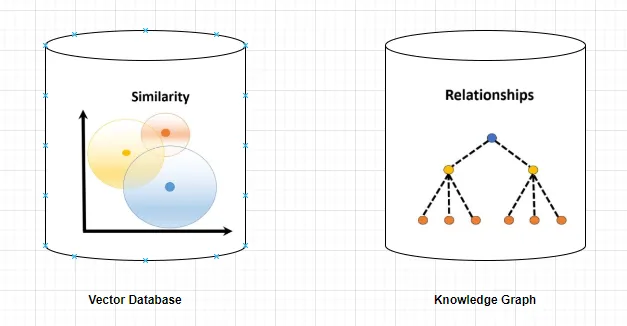

In [ ]:
# Setup Knowledge Graph Index
def setup_knowledge_graph_index(documents):
    graph_store = SimpleGraphStore()
    storage_context = StorageContext.from_defaults(graph_store=graph_store)
    index = KnowledgeGraphIndex.from_documents(
        documents=documents,
        storage_context=storage_context,
        embed_model=embed_model,
        include_embeddings=True,
        max_triplets_per_chunk=10
    )
    return index

# Create Knowledge Graph Index
index = setup_knowledge_graph_index(documents)



### Step 6: Query the Knowledge Graph


In [ ]:
# Query the Knowledge Graph
query = "Tell me about DNA vaccines?"
query_engine = index.as_query_engine(
    include_text=True,
    response_mode="tree_summarize",
    embedding_mode="hybrid",
    similarity_top_k=5,
)

# Message template for the query
message_template = f"""<|system|>Please check if the following pieces of context have any mention of the keywords provided in the Question. If not, then don't know the answer; just say that you don't know. Stop there. Please do not try to make up an answer.</s>
<|user|>
Question: {query}
Helpful Answer:
</s>"""

# Generate the response
response = query_engine.query(message_template)
print(response.response.split("<|assistant|>")[-1].strip())

DNA vaccines can be defined as plasmids containing genes that can be expressed in mammalian cells. They have been shown to induce an efficient immune response and have proven to be effective in various preclinical models. DNA vaccines provide an alternative for both prevention and treatment of infectious diseases, including Chagas disease.



### Explanation and Links

1. **OpenAI**:

   - [OpenAI API Documentation](https://beta.openai.com/docs/)
   
   - OpenAI provides powerful language models that can be used for various natural language processing tasks, including RAG.